In [31]:
# model selection
from ml.models.clustering import KMeans
from ml.functions.distance import MahalanobisDistance

# data manipulation
from ml.dataset import load_csv
from ml.algorithms.normalization import MinMaxScaler

# Utility
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(20)

## Load dataset

In [19]:
X, _ = load_csv('./datasets/quake.csv', no_output=True)

In [20]:
X.shape

(2178, 2)

In [21]:
scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

## Q1 - K-Means

### Q1.a - find best K from DB-index with euclidean distance

In [22]:
best_k = None
best_db_index = None
best_err = None
best_centroids = None

for num_clusters in np.arange(4, 21):
    model = KMeans(num_clusters, 500)
    err, centroids = model.fit(X_scaled)

    db_index = model.db_index(X_scaled)
    print(f"[K={num_clusters}] -> DB-index={db_index}, ReconstructionError={err[-1]}")
    
    if best_db_index is None or db_index < best_db_index:
        best_db_index=db_index
        best_k = num_clusters
        best_err = err
        best_centroids = centroids


[K=4] -> DB-index=11.036715093880296, ReconstructionError=2333.986838639289
[K=5] -> DB-index=12.223053829493157, ReconstructionError=3204.5808877003947
[K=6] -> DB-index=13.247640210144176, ReconstructionError=3705.4667167245534
[K=7] -> DB-index=11.541346596862667, ReconstructionError=4424.962103162654
[K=8] -> DB-index=10.38805615926597, ReconstructionError=4994.087945860349
[K=9] -> DB-index=8.993076331786309, ReconstructionError=6517.891229653506
[K=10] -> DB-index=8.089922073264223, ReconstructionError=7340.256411427437
[K=11] -> DB-index=7.683781615096072, ReconstructionError=9925.470785433854
[K=12] -> DB-index=7.37005916843365, ReconstructionError=8577.018814190582
[K=13] -> DB-index=6.548116882000664, ReconstructionError=9073.323457782491
[K=14] -> DB-index=6.883561312087593, ReconstructionError=9402.906305436203
[K=15] -> DB-index=6.660340408045241, ReconstructionError=10280.144734373274
[K=16] -> DB-index=6.787181534440472, ReconstructionError=11276.19398854827
[K=17] -> DB

In [23]:
print(f"[BEST] -> K={best_k}, DB-index={best_db_index}, ReconstructionError={best_err[-1]}")

[BEST] -> K=19, DB-index=5.8378658992283325, ReconstructionError=15293.703642091812


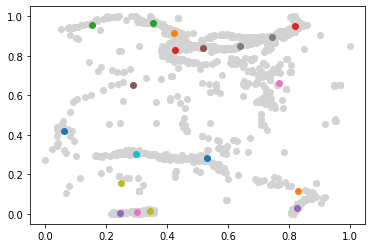

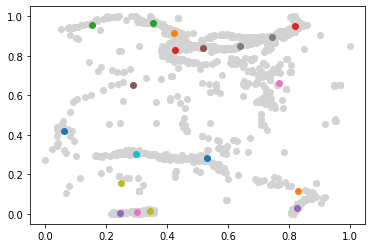

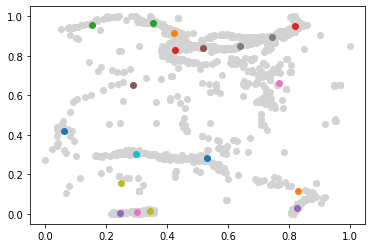

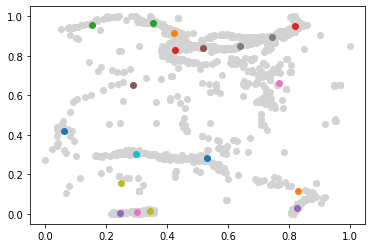

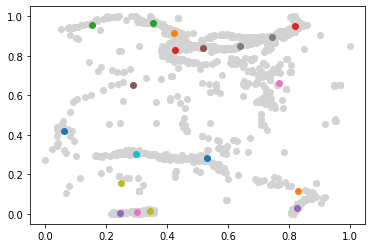

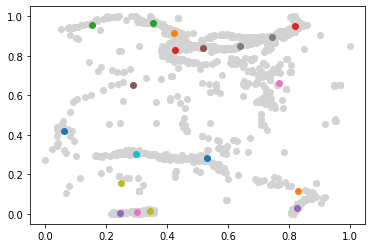

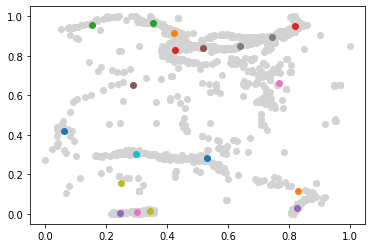

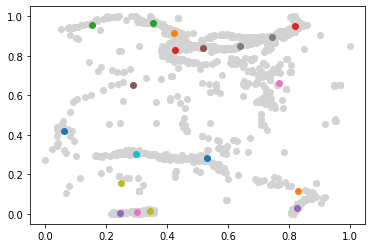

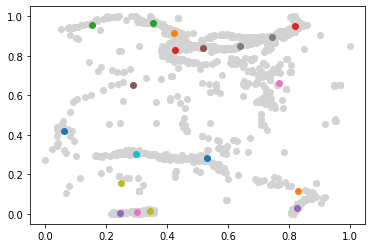

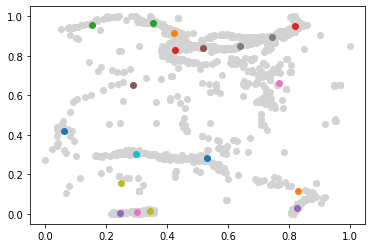

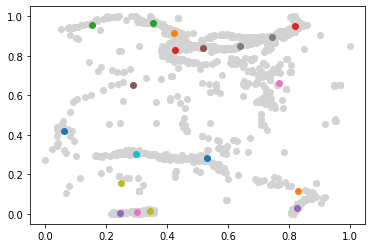

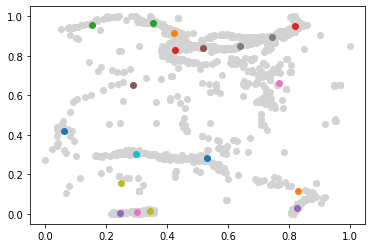

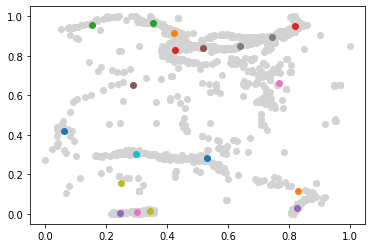

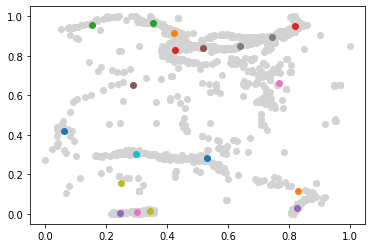

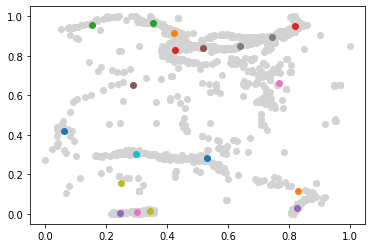

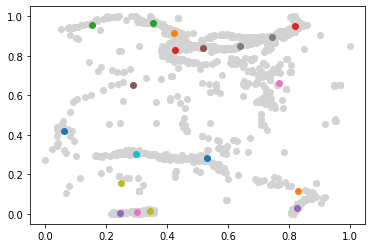

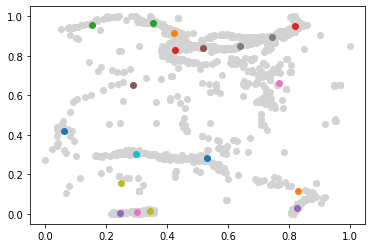

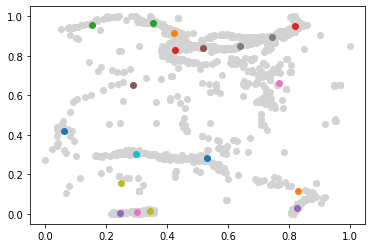

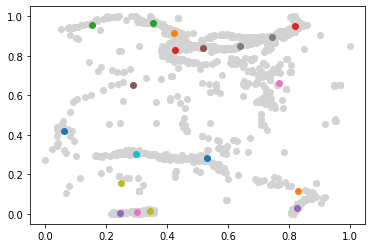

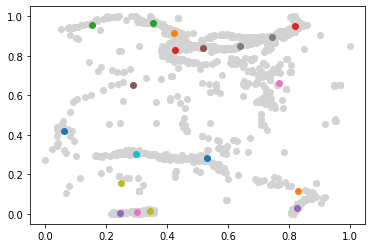

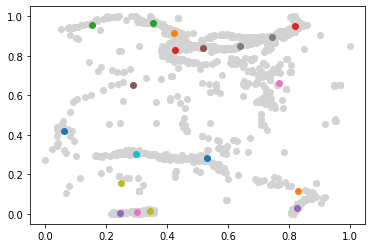

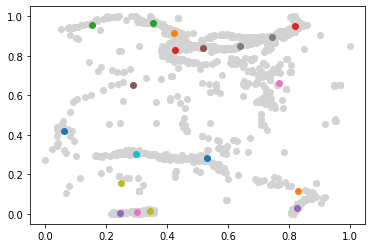

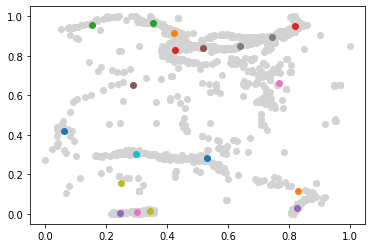

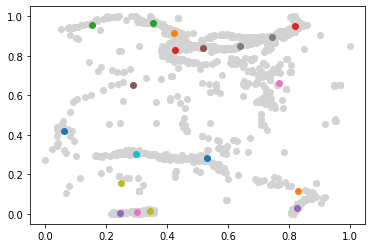

In [28]:
# colors = ['red', 'green']
for iter in range(len(best_err)):
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c='lightgray')
    
    for k in range(best_k):
        plt.scatter(best_centroids[iter][k, 0, 0], best_centroids[iter][k, 0, 1])
    plt.show()

### Q1.b - find best K from DB-index with Mahalanobis distance

In [33]:
best_k = None
best_db_index = None
best_err = None
best_centroids = None

for num_clusters in np.arange(4, 21):
    model = KMeans(num_clusters, 500, distance=MahalanobisDistance)
    err, centroids = model.fit(X_scaled)

    db_index = model.db_index(X_scaled)
    print(f"[K={num_clusters}] -> DB-index={db_index}, ReconstructionError={err[-1]}")
    
    if best_db_index is None or db_index < best_db_index:
        best_db_index=db_index
        best_k = num_clusters
        best_err = err
        best_centroids = centroids


TypeError: measure() got an unexpected keyword argument 'axis'

In [ ]:
print(f"[BEST] -> K={best_k}, DB-index={best_db_index}, ReconstructionError={best_err[-1]}")

[BEST] -> K=19, DB-index=5.8378658992283325, ReconstructionError=15293.703642091812


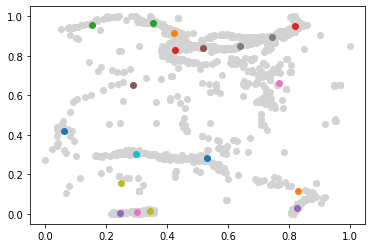

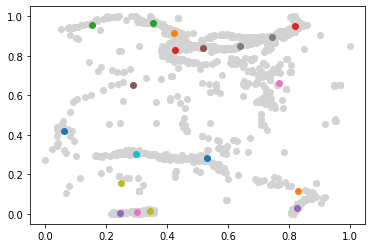

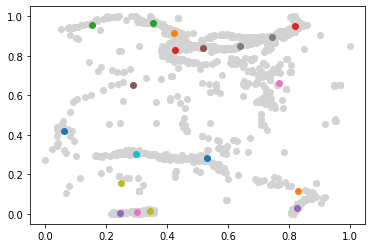

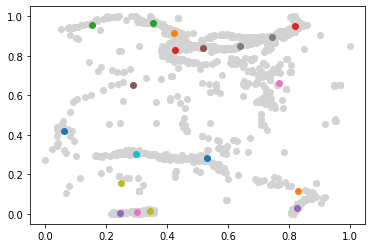

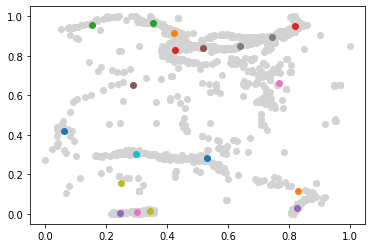

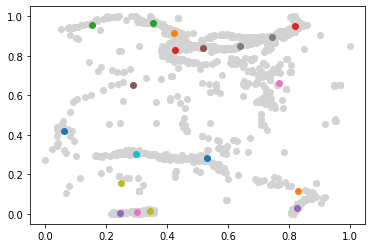

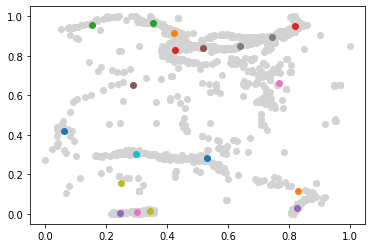

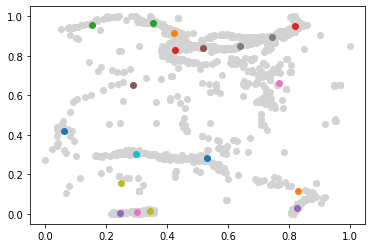

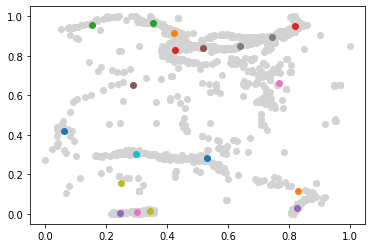

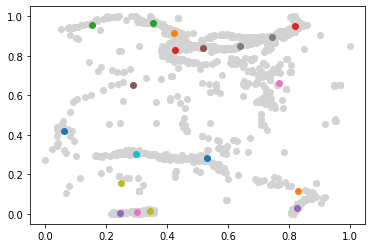

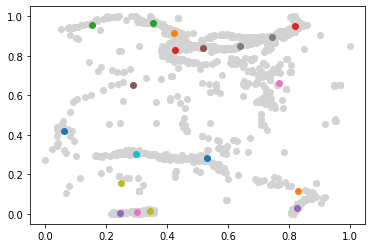

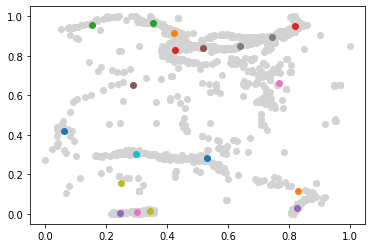

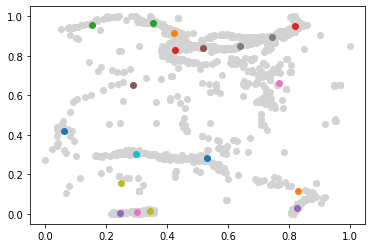

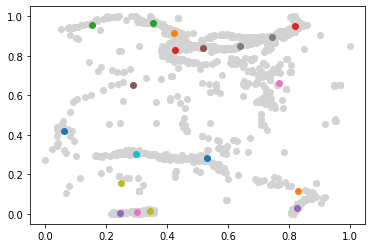

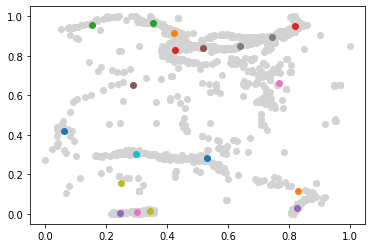

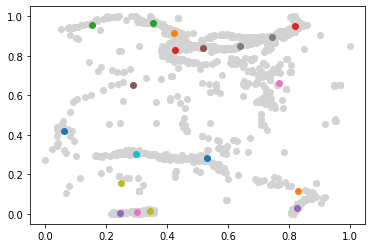

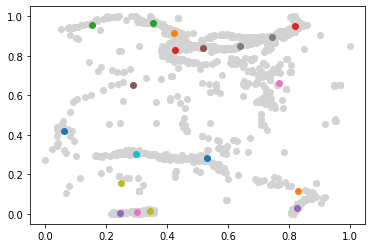

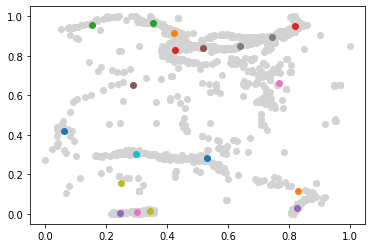

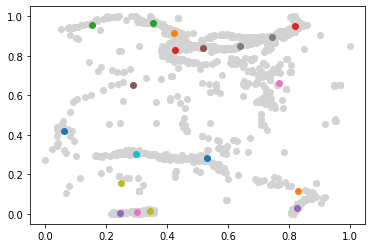

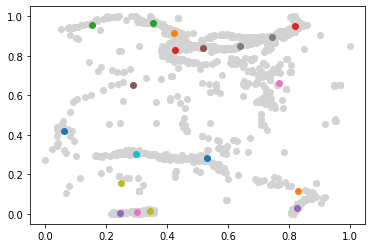

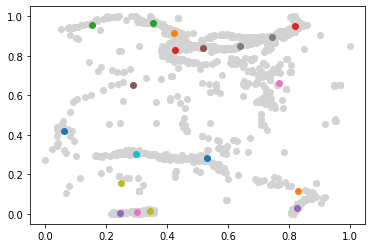

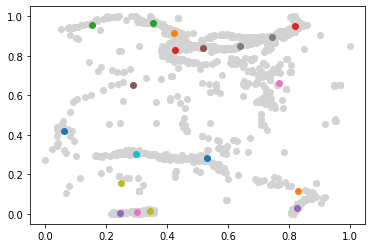

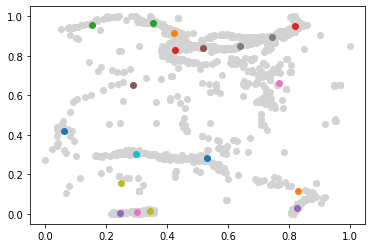

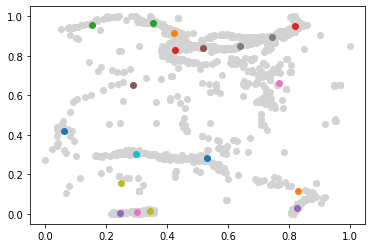

In [ ]:
# colors = ['red', 'green']
for iter in range(len(best_err)):
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c='lightgray')
    
    for k in range(best_k):
        plt.scatter(best_centroids[iter][k, 0, 0], best_centroids[iter][k, 0, 1])
    plt.show()